<a href="https://colab.research.google.com/github/UJWAL-SHAH/ML/blob/master/Lab%20Work/J078_Remedial_Assign_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Remedial Assignment No : 5

#Roll No: J078

#Diabetes Classification Problem

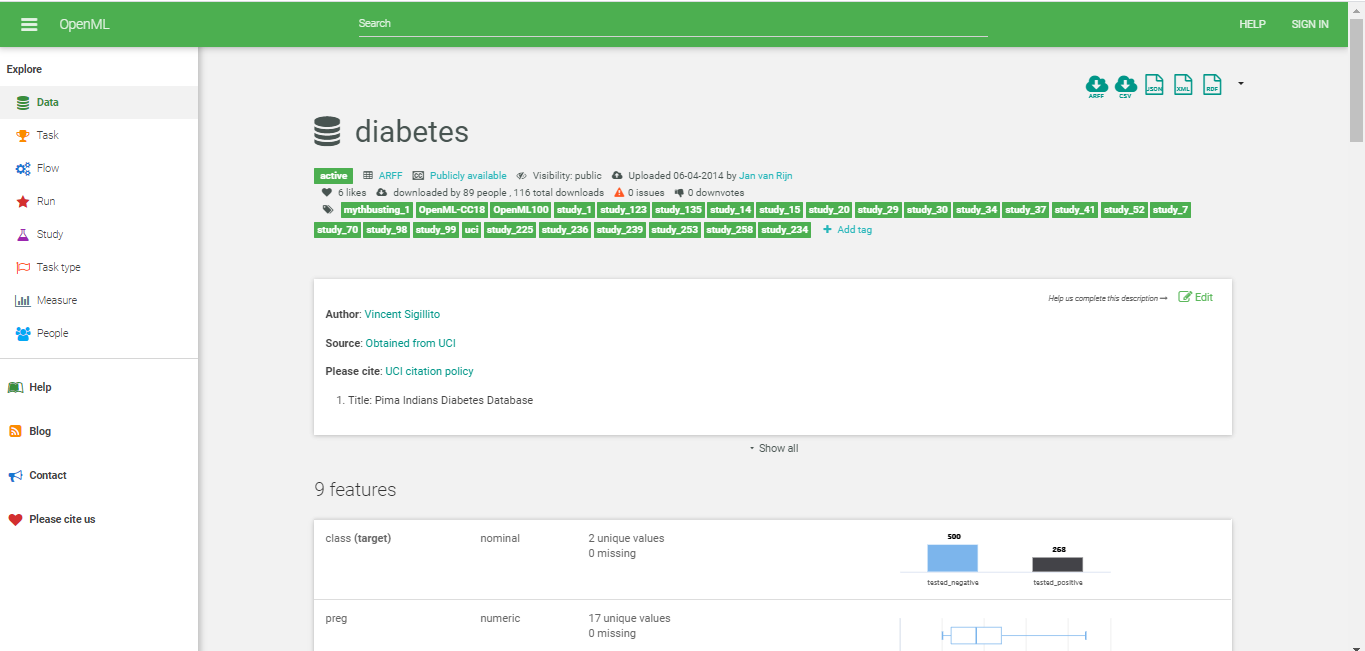

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
data=pd.read_csv("/content/dataset_37_diabetes.csv")
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [78]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

No missing value is there

In [79]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['class']= label_encoder.fit_transform(data["class"])
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


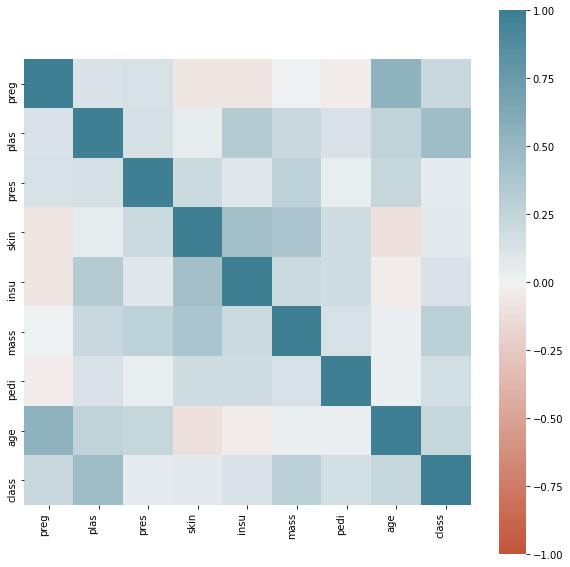

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
fig= plt.subplots(figsize = [10,10])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.show()

As no feature is highly correlated with the Class(Target Varaible) .....Hence will keep as  the features in the model

In [81]:
y=data.pop("class")
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [82]:
extra=data.iloc[:,[0,7]]
extra.head()

,preg,age
0,6,50
1,1,31
2,8,32
3,1,21
4,0,33


In [83]:
data.drop(['preg','age'],axis=1,inplace=True)
data.head()

,plas,pres,skin,insu,mass,pedi
0,148,72,35,0,33.6,0.627
1,85,66,29,0,26.6,0.351
2,183,64,0,0,23.3,0.672
3,89,66,23,94,28.1,0.167
4,137,40,35,168,43.1,2.288


In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#default function for standardising
data=scaler.fit_transform(data)
data=pd.DataFrame(data)
data.head()

,0,1,2,3,4,5
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909


In [85]:
X=pd.concat([data,extra], axis=1)
X.head()

,0,1,2,3,4,5,preg,age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,6,50
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,1,31
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,8,32
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,1,21
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,0,33


In [86]:
from sklearn.model_selection import train_test_split
seed=16
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (614, 8)
X_test Shape:  (154, 8)
y_train Shape:  (614,)
y_test Shape:  (154,)


In [87]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten

filepath = "Remedial_Assign5_Model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30, min_delta=0.01, baseline=0.99)

callbacks_list = [checkpoint, es]

model1=models.Sequential()
model1.add(layers.Dense(64,activation="sigmoid",input_shape=(8,)))
model1.add(Dropout(0.5))
model1.add(layers.Dense(16,activation="tanh"))
model1.add(Dropout(0.5))
model1.add(layers.Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                576       
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_31 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 17        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [88]:
model1.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
history=model1.fit(X_train, y_train, epochs=150,validation_split=0.2,callbacks=callbacks_list)

Epoch 1/150
 1/16 [>.............................] - ETA: 0s - loss: 1.1580 - accuracy: 0.3750
Epoch 00001: val_accuracy improved from -inf to 0.68293, saving model to Remedial_Assign5_Model.hdf5
16/16 [==============================] - 0s 12ms/step - loss: 0.9782 - accuracy: 0.4786 - val_loss: 0.6282 - val_accuracy: 0.6829
Epoch 2/150
 1/16 [>.............................] - ETA: 0s - loss: 0.9940 - accuracy: 0.3438
Epoch 00002: val_accuracy did not improve from 0.68293
16/16 [==============================] - 0s 2ms/step - loss: 0.8638 - accuracy: 0.5743 - val_loss: 0.6372 - val_accuracy: 0.6829
Epoch 3/150
 1/16 [>.............................] - ETA: 0s - loss: 0.8214 - accuracy: 0.5312
Epoch 00003: val_accuracy did not improve from 0.68293
16/16 [==============================] - 0s 3ms/step - loss: 0.8380 - accuracy: 0.5356 - val_loss: 0.6175 - val_accuracy: 0.6829
Epoch 4/150
 1/16 [>.............................] - ETA: 0s - loss: 0.7778 - accuracy: 0.5312
Epoch 00004: val_accu

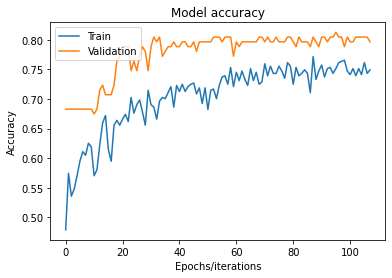

In [90]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

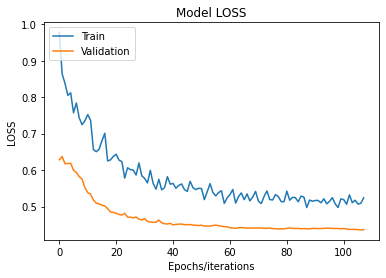

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("LOSS")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

In [92]:
from keras.models import load_model
saved_model = load_model('Remedial_Assign5_Model.hdf5')
test_loss, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss))

Test Accuracy: 0.78571427
Test Loss: 0.410


Test Accuracy:  0.78571427

Test Loss: 0.401

Accuracy coming around ~ 0.75% in Training

Validation & Testing Dataset ~80%

Plot of accuracy of Train & Validation done above

Callback is used here to save the improved model.

Hyper-Parameter used here are:

1)Made 1st Layer of Sigmoid Activation and the input dimension = 8 as 8 variables in dataset.

2)Added next 1 layers and output layers as nodes=1 as binary class in dataset

3)Optimizer used : adam.

4)Metrics: Accuracy to find accuray atlast.

5)loss='binary_crossentropy' as it has 2 different classes

6)Callbackused are: earlystopping, modelcheckpoint.

7)Epoch=150



---

---



